In [5]:
import pandas as pd
import plotly.express as ex
from desdeo_tools.utilities import non_dominated

In [12]:
room1obj = pd.read_csv("room1/objective_vectors_4.csv", index_col=0)
room2obj = pd.read_csv("room2/objective_vectors_4.csv", index_col=0)
room3obj = pd.read_csv("room3/objective_vectors_4.csv", index_col=0)

room1obj["Group"] = 1
room2obj["Group"] = 2
room3obj["Group"] = 3

room1obj.rename(columns={"0": "Surface Area", "1":"Volume", "2":"Min Height", "3":"Floor Area"}, inplace=True)
room2obj.rename(columns={"0": "Surface Area", "1":"Volume", "2":"Min Height", "3":"Floor Area"}, inplace=True)
room3obj.rename(columns={"0": "Surface Area", "1":"Volume", "2":"Min Height", "3":"Floor Area"}, inplace=True)

In [13]:
all_rooms_obj = pd.concat([room1obj, room2obj, room3obj])
all_rooms_obj["Non-dominated"] = non_dominated(
    all_rooms_obj[["Surface Area", "Volume", "Min Height", "Floor Area"]].values)
all_rooms_obj["Volume"] = -all_rooms_obj["Volume"]
all_rooms_obj["Min Height"] = -all_rooms_obj["Min Height"]
all_rooms_obj["Floor Area"] = -all_rooms_obj["Floor Area"]

In [14]:
all_rooms_obj.describe()

,Surface Area,Volume,Min Height,Floor Area,Group
count,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.090112,0.079958,0.201457,0.283640,2.107623
std,0.219113,0.068166,0.131289,0.167442,0.847405
min,0.001154,0.000013,0.000244,0.001468,1.000000
25%,0.002949,0.031116,0.087775,0.166072,1.000000
50%,0.005308,0.067418,0.171828,0.294846,2.000000
75%,0.020021,0.110326,0.321390,0.399206,3.000000
max,1.121189,0.405373,0.497033,0.726819,3.000000


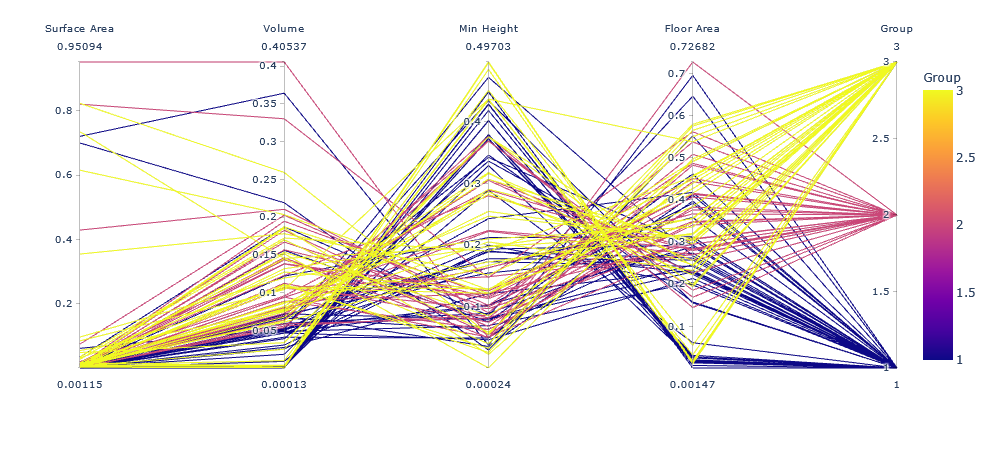

In [21]:
ex.parallel_coordinates(
    all_rooms_obj[all_rooms_obj["Non-dominated"]==True],
    dimensions=["Surface Area", "Volume", "Min Height", "Floor Area", "Group"],
    color="Group",
    #symbol="Non-dominated",
    #size=[1]*len(all_rooms_obj),
    #size_max = 12
)

In [27]:
all_rooms_non_dom = all_rooms_obj[all_rooms_obj["Non-dominated"]==True][["Surface Area", "Volume", "Min Height", "Floor Area"]]

In [28]:
all_rooms_non_dom.to_csv("All_groups_tent_problem_4_obj.csv", index=False)